In [12]:
import pandas as pd
import re
import numpy as np
from datetime import timedelta
import seaborn as sns
import json
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Generate
trace_path = "/workspace/projects/intogen_plus/fixdatasets-20230223/intogen-plus/run_20230224_ALL/trace.txt"
trace_path = "/workspace/projects/intogen_plus/fixdatasets-20230223/intogen-plus/run_20230224_ALL/trace-20231031-64800245.txt"
trace_path = "/workspace/datasets/intogen/runs/dev-o3d/intogen_o3d.txt"
generate_tsv = "cat trace.txt | cut -f 4,9,10,16 | grep -e ^CBaSE -e ^HotMAPS -e ^MutPanning -e ^OncodriveCLUSTL -e ^OncodriveFML -e ^SMRegions -e ^dNdScv | sort -k 2 > intogen_methods_all_cohorts.tsv"
generate_tsv = "cat trace-20231031-64800245.txt | cut -f 4,9,10,16 | grep -e ^Oncodrive3D -e ^SEISMIC -e ^CBaSE -e ^HotMAPS -e ^MutPanning -e ^OncodriveCLUSTL -e ^OncodriveFML -e ^SMRegions -e ^dNdScv | sort -k 2 > /workspace/projects/clustering_3d/o3d_analysys/analysys/evaluation/resources_analysis/traces/intogen_o3d.txt"
#trace_oncodrive3d_path = "/workspace/projects/clustering_3d/o3d_analysys/datasets/output/cancer/o3d_output/run_20230914_5506/report/trace_oncodrive3d.tsv"

In [14]:
# Extract"intogen_methods_all_cohorts.tsv /workspace/projects/clustering_3d/o3d_analysys/analysys/evaluation/resources_analysis/traces/intogen_hotmaps.txt"
o3d_tsv = "/workspace/projects/clustering_3d/o3d_analysys/analysys/evaluation/resources_analysis/traces/intogen_o3d.txt"
hotmaps_tsv = "/workspace/projects/clustering_3d/o3d_analysys/analysys/evaluation/resources_analysis/traces/intogen_hotmaps.txt"

In [15]:
def get_hours(duration):
    
    # Parse the duration components
    duration_parts = duration.split()
    days = 0
    hours = 0
    minutes = 0
    seconds = 0

    for part in duration_parts:
        if part.endswith("d"):
            days = float(part[:-1])
        elif part.endswith("h"):
            hours = float(part[:-1])
        elif part.endswith("ms"):
            pass
        elif part.endswith("m"):
            minutes = float(part[:-1])
        elif part.endswith("s"):
            seconds = float(part[:-1])

    # Calculate the total hours
    total_hours = (days * 24) + hours + (minutes / 60) + (seconds / 3600)
    
    return total_hours

In [16]:
cpu_allocated = {"OncodriveFML" : 14,
                 "OncodriveCLUSTL" : 14,
                 "MutPanning" : 8,
                 "HotMAPS" : 14,
                 "Oncodrive3D" : 14,
                 "SMRegions" : 14,
                 "dNdScv" : 1,
                 "CBaSE" : 1,
                 "SEISMIC" : 1}

### HotMAPS

In [17]:
# Get HotMAPS & others
methods = pd.read_csv(hotmaps_tsv, sep="\t", header=None)
methods["Method"] = methods.apply(lambda x: x[0].split(" ")[0], axis=1)
methods["Cohort"] = methods.apply(lambda x: x[0].split(" ")[2], axis=1)
methods = methods.drop(columns=[0])
methods = methods.rename(columns = {1 : "CPU%", 2 : "Memory", 3 : "Time"})
methods["CPU%"] = methods.apply(lambda x: re.sub(r'[^0-9.]', "", x["CPU%"]), axis=1)
methods["Cohort"] = methods.apply(lambda x: re.sub(r'\)', "", x["Cohort"]), axis=1)
methods["CPU%"] = pd.to_numeric(methods["CPU%"])
methods.insert(0, "Method", methods.pop("Method"))
methods["CPU_allocated"] = methods.apply(lambda x: cpu_allocated[x["Method"]], axis=1)
methods

,Method,CPU%,Memory,Time,Cohort,CPU_allocated
0,CBaSE,99.4,3.1 GB,42m 54s,CBIOP_WGS_PRAD_EURUROL_2017,1
1,CBaSE,99.4,2.2 GB,1h 19m 45s,CBIOP_WGS_STAD_ONCOSG_2018,1
2,CBaSE,99.1,2.2 GB,37m 12s,CBIOP_WXS_ACY_2019,1
3,CBaSE,99.4,3.1 GB,44m 21s,CBIOP_WXS_ACYC_MDA_2015,1
4,CBaSE,99.4,2.9 GB,1h 11m 12s,CBIOP_WXS_ACYC_SANGER_2013,1
...,...,...,...,...,...,...
1838,SMRegions,124.1,64.5 GB,8.9s,TCGA_WXS_THYM,14
1839,SMRegions,650.5,64.2 GB,35.6s,TCGA_WXS_UCEC,14
1840,SMRegions,137.1,1.5 GB,19.9s,TCGA_WXS_UCS,14
1841,SMRegions,121.5,4.3 GB,16.9s,TCGA_WXS_UM,14


In [18]:
hotmaps = methods[methods["Method"] == "HotMAPS"].reset_index(drop=True)
hotmaps
# hotmaps = hotmaps[~hotmaps["Cohort"].str.startswith("ICGC")]
# hotmaps

,Method,CPU%,Memory,Time,Cohort,CPU_allocated
0,HotMAPS,855.3,47.8 GB,1h 24m 27s,CBIOP_WGS_PRAD_EURUROL_2017,14
1,HotMAPS,1118.9,64.6 GB,9h 3s,CBIOP_WGS_STAD_ONCOSG_2018,14
2,HotMAPS,865.4,48.9 GB,1h 15m 18s,CBIOP_WXS_ACY_2019,14
3,HotMAPS,690.0,38.1 GB,43m 25s,CBIOP_WXS_ACYC_MDA_2015,14
4,HotMAPS,862.4,32.8 GB,26m 50s,CBIOP_WXS_ACYC_SANGER_2013,14
...,...,...,...,...,...,...
257,HotMAPS,1045.1,51.8 GB,2h 2m 1s,TCGA_WXS_THYM,14
258,HotMAPS,1062.9,96.8 GB,22h 57m 58s,TCGA_WXS_UCEC,14
259,HotMAPS,1110.5,60.6 GB,2h 46m 46s,TCGA_WXS_UCS,14
260,HotMAPS,1114.9,49.3 GB,1h 34m 17s,TCGA_WXS_UM,14


### Oncodrive3D

In [19]:
# Get O3D and others
o3d = pd.read_csv(o3d_tsv, sep="\t", header=None)
o3d["Method"] = o3d.apply(lambda x: x[0].split(" ")[0], axis=1)
o3d["Cohort"] = o3d.apply(lambda x: x[0].split(" ")[2], axis=1)
o3d = o3d.drop(columns=[0])
o3d = o3d.rename(columns = {1 : "CPU%", 2 : "Memory", 3 : "Time"})
o3d["CPU%"] = o3d.apply(lambda x: re.sub(r'[^0-9.]', "", x["CPU%"]), axis=1)
o3d["Cohort"] = o3d.apply(lambda x: re.sub(r'\)', "", x["Cohort"]), axis=1)
o3d["CPU%"] = pd.to_numeric(o3d["CPU%"])
o3d[o3d["Method"] == "Oncodrive3D"]
o3d["CPU_allocated"] = o3d.apply(lambda x: cpu_allocated[x["Method"]], axis=1)
o3d

,CPU%,Memory,Time,Method,Cohort,CPU_allocated
0,100.0,2.5 GB,1h 3m 44s,CBaSE,HARTWIG_WGS_ANSC_2020,1
1,100.0,2.2 GB,56m 33s,CBaSE,HARTWIG_WGS_BCC_2020,1
2,100.0,2.6 GB,2h 27s,CBaSE,HARTWIG_WGS_BLCA_2020,1
3,100.0,2.4 GB,4h 39m 53s,CBaSE,HARTWIG_WGS_BRCA_2020,1
4,75.4,2.5 GB,8h 26m 37s,CBaSE,HARTWIG_WGS_CESC_2020,1
...,...,...,...,...,...,...
515,94.9,4.5 GB,34.2s,SMRegions,TCGA_WXS_THYM,14
516,374.9,64.2 GB,1m 2s,SMRegions,TCGA_WXS_UCEC,14
517,80.2,4.3 GB,52.5s,SMRegions,TCGA_WXS_UCS,14
518,121.3,4.3 GB,17.9s,SMRegions,TCGA_WXS_UM,14


### Get IntOGen methods (old)

In [20]:
# path_dir = "/workspace/projects/clustering_3d/evaluation/optimization_analysis"
# methods = pd.read_csv(f"{path_dir}/intogen_methods_all_cohorts.tsv", sep="\t", header=None)
# methods["Method"] = methods.apply(lambda x: x[0].split(" ")[0], axis=1)
# methods["Cohort"] = methods.apply(lambda x: x[0].split(" ")[2], axis=1)
# methods = methods.drop(columns=[0])
# methods = methods.rename(columns = {1 : "CPU%", 2 : "Memory", 3 : "Time"})
# methods["CPU%"] = methods.apply(lambda x: re.sub(r'[^0-9.]', "", x["CPU%"]), axis=1)
# methods["Cohort"] = methods.apply(lambda x: re.sub(r'\)', "", x["Cohort"]), axis=1)
# methods["CPU%"] = pd.to_numeric(methods["CPU%"])
# methods.insert(0, "Method", methods.pop("Method"))
# methods["CPU_allocated"] = methods.apply(lambda x: cpu_allocated[x["Method"]], axis=1)
# methods

### Get Oncodrive3D (old)

In [11]:
# path_dir = "/workspace/projects/clustering_3d/evaluation/optimization_analysis"
# o3d = pd.read_csv(trace_oncodrive3d_path, sep="\t", header=None)
# o3d["Method"] = o3d.apply(lambda x: x[0].split(" ")[0], axis=1)
# o3d["Cohort"] = o3d.apply(lambda x: x[0].split(" (Clustering on ")[1].replace(")", ""), axis=1)
# o3d = o3d.drop(columns=[0])
# o3d = o3d.rename(columns = {1 : "CPU%", 2 : "Memory", 3 : "Time"})
# o3d["CPU%"] = o3d.apply(lambda x: re.sub(r'[^0-9.]', "", x["CPU%"]), axis=1)
# o3d["Cohort"] = o3d.apply(lambda x: re.sub(r'\)', "", x["Cohort"]), axis=1)
# o3d["CPU%"] = pd.to_numeric(o3d["CPU%"])
# o3d.insert(0, "Method", o3d.pop("Method"))
# o3d["Method"] = "Oncodrive3D"
# o3d["CPU_allocated"] = o3d.apply(lambda x: cpu_allocated[x["Method"]], axis=1)
# o3d

### Concat

In [21]:
cohorts = [cohort for cohort in o3d.Cohort.unique() if cohort in hotmaps.Cohort.unique()]
methods = pd.concat((o3d[[c in cohorts for c in o3d.Cohort]], 
                     hotmaps[[c in cohorts for c in hotmaps.Cohort]])).sort_values(["Cohort"]).reset_index(drop=True)
methods

,CPU%,Memory,Time,Method,Cohort,CPU_allocated
0,100.0,2.5 GB,1h 3m 44s,CBaSE,HARTWIG_WGS_ANSC_2020,1
1,567.2,49.9 GB,2h 27m 53s,HotMAPS,HARTWIG_WGS_ANSC_2020,14
2,99.8,3 GB,52.6s,dNdScv,HARTWIG_WGS_ANSC_2020,1
3,486.9,83 GB,2m 5s,OncodriveFML,HARTWIG_WGS_ANSC_2020,14
4,269.5,39 GB,2m 43s,OncodriveCLUSTL,HARTWIG_WGS_ANSC_2020,14
...,...,...,...,...,...,...
580,95.5,2.4 GB,1h 25m,CBaSE,TCGA_WXS_WDTC,1
581,308.0,68.5 GB,13m 52s,OncodriveCLUSTL,TCGA_WXS_WDTC,14
582,153.5,37.3 GB,1h 31m 25s,Oncodrive3D,TCGA_WXS_WDTC,14
583,576.0,83.8 GB,4m 3s,OncodriveFML,TCGA_WXS_WDTC,14


### Complete parsing

In [22]:
methods = methods[~methods.isna().any(axis=1)]
methods["Time"] = methods.apply(lambda x: get_hours(x["Time"]), axis=1)
methods["Memory"] = pd.to_numeric(methods.apply(lambda x: re.sub(r'[^0-9.]', "", x["Memory"]), axis=1))
methods = methods.rename(columns = {"Memory" : "Memory_GB", "Time" : "Time_H"})
methods

,CPU%,Memory_GB,Time_H,Method,Cohort,CPU_allocated
0,100.0,2.5,1.062222,CBaSE,HARTWIG_WGS_ANSC_2020,1
1,567.2,49.9,2.464722,HotMAPS,HARTWIG_WGS_ANSC_2020,14
2,99.8,3.0,0.014611,dNdScv,HARTWIG_WGS_ANSC_2020,1
3,486.9,83.0,0.034722,OncodriveFML,HARTWIG_WGS_ANSC_2020,14
4,269.5,39.0,0.045278,OncodriveCLUSTL,HARTWIG_WGS_ANSC_2020,14
...,...,...,...,...,...,...
580,95.5,2.4,1.416667,CBaSE,TCGA_WXS_WDTC,1
581,308.0,68.5,0.231111,OncodriveCLUSTL,TCGA_WXS_WDTC,14
582,153.5,37.3,1.523611,Oncodrive3D,TCGA_WXS_WDTC,14
583,576.0,83.8,0.067500,OncodriveFML,TCGA_WXS_WDTC,14


In [26]:
test = methods[methods["Cohort"].str.startswith("TCGA")]
test = test[test["Method"] == "Oncodrive3D"].sort_values("Time_H")
test


,CPU%,Memory_GB,Time_H,Method,Cohort,CPU_allocated
487,537.1,27.9,0.019167,Oncodrive3D,TCGA_WXS_PGNG,14
570,422.0,27.4,0.021944,Oncodrive3D,TCGA_WXS_UM,14
542,700.4,29.7,0.022778,Oncodrive3D,TCGA_WXS_THYM,14
357,552.3,29.9,0.023889,Oncodrive3D,TCGA_WXS_CHOL,14
365,430.4,27.6,0.024444,Oncodrive3D,TCGA_WXS_CHRCC,14
463,676.8,29.4,0.025278,Oncodrive3D,TCGA_WXS_MGCT,14
497,644.0,29.3,0.026944,Oncodrive3D,TCGA_WXS_PLMESO,14
566,665.1,32.5,0.045278,Oncodrive3D,TCGA_WXS_UCS,14
384,848.0,32.5,0.057222,Oncodrive3D,TCGA_WXS_DLBCLNOS,14
298,728.2,33.2,0.058889,Oncodrive3D,TCGA_WXS_ACC,14


In [128]:
methods[methods["Cohort"] == "TCGA_WXS_MEL"]

,CPU%,Memory_GB,Time_H,Method,Cohort,CPU_allocated
450,556.0,66.1,0.022222,SMRegions,TCGA_WXS_MEL,14
451,119.5,33.8,0.345833,MutPanning,TCGA_WXS_MEL,8
452,1279.5,62.9,1.840556,Oncodrive3D,TCGA_WXS_MEL,14
453,100.1,2.7,16.483611,CBaSE,TCGA_WXS_MEL,1
454,1.1,10.8,5.683333,SEISMIC,TCGA_WXS_MEL,1
455,551.3,77.6,9.230000,OncodriveCLUSTL,TCGA_WXS_MEL,14
456,100.0,3.1,0.114444,dNdScv,TCGA_WXS_MEL,1
457,1065.6,86.0,0.253889,OncodriveFML,TCGA_WXS_MEL,14
458,856.3,91.6,40.767778,HotMAPS,TCGA_WXS_MEL,14


## Plot

In [10]:
methods = methods[methods["Method"] != "CBaSE"].reset_index(drop=True)
methods

,Method,CPU%,Memory_GB,Time_H,Cohort,CPU_allocated
0,Oncodrive3D,364.3,15.9,0.014056,CBIOP_WGS_PRAD_EURUROL_2017,10
1,SMRegions,136.7,4.4,0.002472,CBIOP_WGS_PRAD_EURUROL_2017,14
2,OncodriveFML,443.1,82.0,0.023889,CBIOP_WGS_PRAD_EURUROL_2017,14
3,OncodriveCLUSTL,317.8,54.8,0.040833,CBIOP_WGS_PRAD_EURUROL_2017,14
4,MutPanning,119.8,33.8,0.185833,CBIOP_WGS_PRAD_EURUROL_2017,8
...,...,...,...,...,...,...
1837,dNdScv,97.4,2.8,0.009556,TCGA_WXS_WDTC,1
1838,OncodriveFML,583.8,83.8,0.068611,TCGA_WXS_WDTC,14
1839,SMRegions,165.6,4.4,0.002639,TCGA_WXS_WDTC,14
1840,MutPanning,122.6,33.8,0.110278,TCGA_WXS_WDTC,8


In [129]:
methods_tcga = methods[methods["Cohort"].str.startswith("TCGA")].reset_index(drop=True)
methods_tcga

,CPU%,Memory_GB,Time_H,Method,Cohort,CPU_allocated
0,300.0,62.1,0.111111,OncodriveCLUSTL,TCGA_WXS_ACC,14
1,728.2,33.2,0.058889,Oncodrive3D,TCGA_WXS_ACC,14
2,554.4,83.4,0.050000,OncodriveFML,TCGA_WXS_ACC,14
3,89.7,4.3,0.015056,SMRegions,TCGA_WXS_ACC,14
4,99.9,3.1,0.015889,dNdScv,TCGA_WXS_ACC,1
...,...,...,...,...,...,...
283,95.5,2.4,1.416667,CBaSE,TCGA_WXS_WDTC,1
284,308.0,68.5,0.231111,OncodriveCLUSTL,TCGA_WXS_WDTC,14
285,153.5,37.3,1.523611,Oncodrive3D,TCGA_WXS_WDTC,14
286,576.0,83.8,0.067500,OncodriveFML,TCGA_WXS_WDTC,14


In [130]:
methods_tcga = methods[methods["Cohort"].str.startswith("TCGA")]
average = methods_tcga.groupby("Cohort").mean()
average.columns = [f"{col}_avg" for col in average.columns]
average = average.reset_index()
methods_tcga = methods_tcga.merge(average, how="left", on="Cohort")
methods_tcga

,CPU%,Memory_GB,Time_H,Method,Cohort,CPU_allocated,CPU%_avg,Memory_GB_avg,Time_H_avg,CPU_allocated_avg
0,300.0,62.1,0.111111,OncodriveCLUSTL,TCGA_WXS_ACC,14,348.588889,31.433333,0.554673,9.0
1,728.2,33.2,0.058889,Oncodrive3D,TCGA_WXS_ACC,14,348.588889,31.433333,0.554673,9.0
2,554.4,83.4,0.050000,OncodriveFML,TCGA_WXS_ACC,14,348.588889,31.433333,0.554673,9.0
3,89.7,4.3,0.015056,SMRegions,TCGA_WXS_ACC,14,348.588889,31.433333,0.554673,9.0
4,99.9,3.1,0.015889,dNdScv,TCGA_WXS_ACC,1,348.588889,31.433333,0.554673,9.0
...,...,...,...,...,...,...,...,...,...,...
283,95.5,2.4,1.416667,CBaSE,TCGA_WXS_WDTC,1,303.377778,36.588889,0.984404,9.0
284,308.0,68.5,0.231111,OncodriveCLUSTL,TCGA_WXS_WDTC,14,303.377778,36.588889,0.984404,9.0
285,153.5,37.3,1.523611,Oncodrive3D,TCGA_WXS_WDTC,14,303.377778,36.588889,0.984404,9.0
286,576.0,83.8,0.067500,OncodriveFML,TCGA_WXS_WDTC,14,303.377778,36.588889,0.984404,9.0


In [131]:
average = methods.groupby("Cohort").mean()
average.columns = [f"{col}_avg" for col in average.columns]
average = average.reset_index()
methods = methods.merge(average, how="left", on="Cohort")
methods

,CPU%,Memory_GB,Time_H,Method,Cohort,CPU_allocated,CPU%_avg,Memory_GB_avg,Time_H_avg,CPU_allocated_avg
0,100.0,2.5,1.062222,CBaSE,HARTWIG_WGS_ANSC_2020,1,270.522222,28.400000,0.528923,9.0
1,567.2,49.9,2.464722,HotMAPS,HARTWIG_WGS_ANSC_2020,14,270.522222,28.400000,0.528923,9.0
2,99.8,3.0,0.014611,dNdScv,HARTWIG_WGS_ANSC_2020,1,270.522222,28.400000,0.528923,9.0
3,486.9,83.0,0.034722,OncodriveFML,HARTWIG_WGS_ANSC_2020,14,270.522222,28.400000,0.528923,9.0
4,269.5,39.0,0.045278,OncodriveCLUSTL,HARTWIG_WGS_ANSC_2020,14,270.522222,28.400000,0.528923,9.0
...,...,...,...,...,...,...,...,...,...,...
580,95.5,2.4,1.416667,CBaSE,TCGA_WXS_WDTC,1,303.377778,36.588889,0.984404,9.0
581,308.0,68.5,0.231111,OncodriveCLUSTL,TCGA_WXS_WDTC,14,303.377778,36.588889,0.984404,9.0
582,153.5,37.3,1.523611,Oncodrive3D,TCGA_WXS_WDTC,14,303.377778,36.588889,0.984404,9.0
583,576.0,83.8,0.067500,OncodriveFML,TCGA_WXS_WDTC,14,303.377778,36.588889,0.984404,9.0


In [153]:
method2color = {'dNdScv':'lightgray',
                #'Clust_3d':'#ffad48', 'Clust_3d_MP':'darkorange', "Clust_3d_bgsign" : "coral", 'Clust_3d_pCMAP':'chocolate', 
                "Oncodrive3D" : '#ffad48',
                'MutPanning':'lightgray','CBaSE':'lightgray',
                'SMRegions':'lightgray','HotMAPS':'#024b79', "HotMAPS_myrun" : "navy",
                'OncodriveCLUSTL':'#43b7c2','OncodriveFML':'lightgray', 'SEISMIC':'lightgray'}


def plot_performance(df, colors_dic, title, ax, text_ylabel, cpu_allocated,
                     smooth = False, ema_w = 0.9,
                     xlabel = True, ylabel = True,
                     legend = True, target="Time_H", metric="H",
                     style="-", plot_xticks=True, extract_cancer=True):
    
    df = df.copy()
    if extract_cancer:
        df["Cohort"] = df["Cohort"].apply(lambda x: x.split("_")[len(x.split("_"))-1])
    df = df.set_index("Cohort")
    
    sorted_methods=df.groupby("Method")[target].mean().sort_values(ascending=False).index
    
    for method in sorted_methods:
        
        if method in ["HotMAPS", "Oncodrive3D", "OncodriveCLUSTL"]:
            alpha=1
        else:
            alpha=0.7

        x = df.loc[df["Method"] == method]
        
        if smooth:
            xs = ema_smooth(x[target], ema_w)
        else: 
            xs = x[target]
        ax.plot(xs, style, color = colors_dic[method], 
                label = f"{method} (cores = {cpu_allocated[method]})", zorder = get_zorder(method), alpha=alpha)
    
    ax.legend(fontsize = 12, ncol = 1)
    if not legend:
        ax.get_legend().remove()
    
    if plot_xticks:    
        plt.xticks(rotation=45, rotation_mode="anchor", ha='right') 
    else:
        plt.xticks([])
    ax.tick_params(axis='y', labelsize=12)
    
    if ylabel:
        ax.set_ylabel(text_ylabel, fontsize = 15)
    else:
        ax.set_ylabel("\n\n", fontsize = 15)
        
    ax.set_xlabel("\nCohort\n", fontsize = 15)
    ax.set_title(title, fontsize = 18)
    ax.grid(False)
    ax.spines["left"].set_color("darkgray")
    ax.spines["right"].set_color("white")
    ax.spines["bottom"].set_color("darkgray")
    ax.spines["top"].set_color("white")   
    
    
def get_zorder(col):
    """
    Prioritize order of the clustering methods
    """
    
    if col == "Oncodrive3D":
        zorder = 3
    elif col == "HotMAPS":
        zorder = 2
    elif col == "OncodriveCLUSTL":
        zorder = 1
    else:
        zorder = 0
        
    return zorder


def ema_smooth(scalars: list[float], weight: float) -> list[float]:
    """
    EMA implementation according to
    https://github.com/tensorflow/tensorboard/blob/34877f15153e1a2087316b9952c931807a122aa7/tensorboard/components/vz_line_chart2/line-chart.ts#L699
    
    NB: copied from stack-overflow
    """
    
    last = 0
    smoothed = []
    num_acc = 0
    for next_val in scalars:
        last = last * weight + (1 - weight) * next_val
        num_acc += 1
        # de-bias
        debias_weight = 1
        if weight != 1:
            debias_weight = 1 - math.pow(weight, num_acc)
        smoothed_val = last / debias_weight
        smoothed.append(smoothed_val)

    return smoothed

In [146]:
def tick_generator(df):
    """
    Returns a list with the y ticks labels and its descreptive statistic
    """
    ticks_list = []
    for method in df["Method"]:
        ticks_list.append(method)
    return ticks_list


def plot_sum(df, color_dic, title, ax, distance, xlabel_text, 
             xlabel = True, ylabel = False, legend = True, target = "Time_H", metric="H", rotation=0):
    """
    Plot count bar plot summary
    """
    
    df = df.copy()
    data = df.groupby("Method").sum().sort_values(target, ascending=False).reset_index()
    bar_plot = sns.barplot(data = data, x = target, y = "Method", palette = color_dic, ax = ax)
    
    # Config labels
    if xlabel:
        bar_plot.set_xlabel(xlabel_text,size = 15)
    else:
        bar_plot.set_xlabel("\n\n", size = 15)
        
    bar_plot.set_ylabel("")
    bar_plot.tick_params(axis="y", which = "major", labelsize = 13, direction = "in")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=rotation)
    
    # Add text on the right of each bar
    avg = methods.groupby("Method").mean().reset_index()
    for i, (p, pr) in enumerate(zip(data["Method"], data[target])):
        
        # Add avg info
        avg_value = round(avg.loc[avg["Method"] == p, target].values[0], 2)
        if target == "Time_H":
            avg_value = f"(μ: {avg_value} h)"
        elif target == "Memory_GB":
            avg_value = f"(μ: {avg_value} GB)"
        
        if metric == "H" or metric == "GB":
            txt = f"{round(pr)} {metric}\n{avg_value}"
        elif metric == "days" or metric == "D" or metric == "d":
            txt = f"{round(pr / 24, 2)} {metric} {avg_value}"
        elif metric == "TB":
            txt = f"{round(pr / 1024, 2)} {metric} {avg_value}"

        bar_plot.text(s=txt, x=pr+distance, y=i, color="black",verticalalignment="center",
                      horizontalalignment = "left", size=12)
    
    bar_plot.grid(False)
    bar_plot.spines["left"].set_color("darkgray")
    bar_plot.spines["right"].set_color("white")
    bar_plot.spines["bottom"].set_color("darkgray")
    bar_plot.spines["top"].set_color("white")  
    
    return bar_plot

In [134]:
methods_tcga.groupby("Method").sum()["Time_H"] / 24

Method
CBaSE               3.981285
HotMAPS            14.783472
MutPanning          0.563970
Oncodrive3D         0.637014
OncodriveCLUSTL     1.718553
OncodriveFML        0.130475
SEISMIC             2.063912
SMRegions           0.016388
dNdScv              0.037838
Name: Time_H, dtype: float64

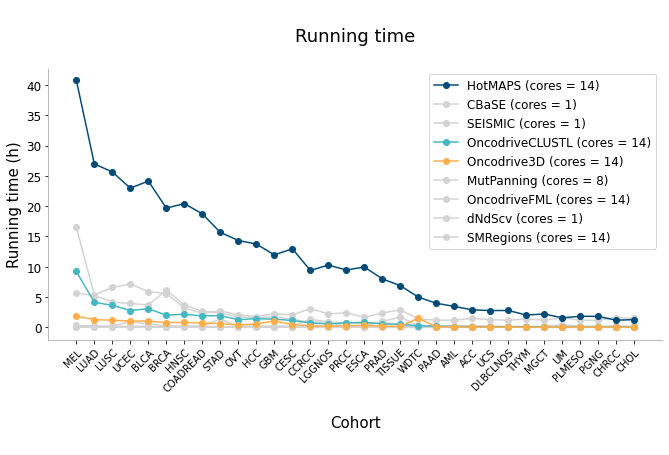

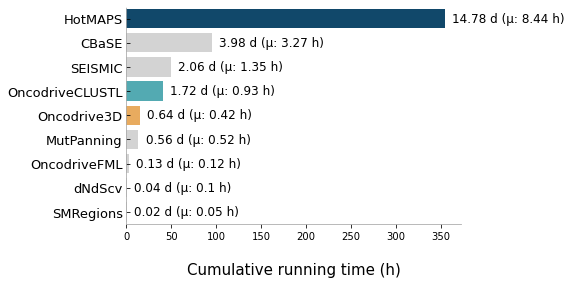

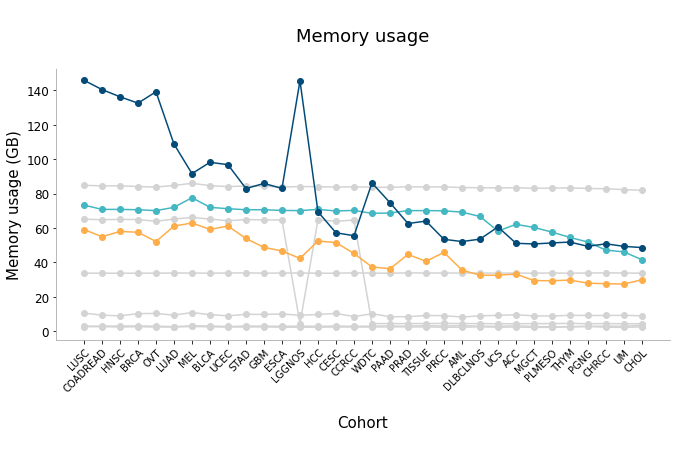

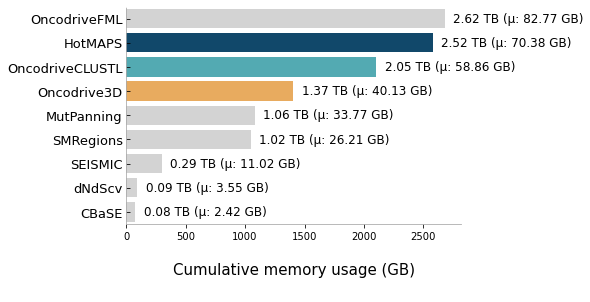

In [150]:
fig, ax = plt.subplots(figsize = (11, 5))
plot_performance(methods_tcga.sort_values("Time_H_avg", ascending=False).reset_index(drop=True), 
                 method2color, title = "\nRunning time\n", metric = "d", 
                 ax = ax, text_ylabel = "Running time (h)", xlabel = True, ylabel = True, 
                 legend = True, cpu_allocated=cpu_allocated,
                 style="-o", plot_xticks=True, extract_cancer=True)
plt.savefig('runtime_tcga.png', dpi=300, bbox_inches='tight')
plt.show

fig, ax = plt.subplots(figsize = (6, 4))
plot_sum(methods_tcga, method2color, title="", ax=ax, distance = 8, xlabel_text = "\nCumulative running time (h)\n", metric="d")
plt.savefig('cumulative_runtime_tcga.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize = (11, 5))
plot_performance(methods_tcga.sort_values("Memory_GB_avg", ascending=False).reset_index(drop=True), 
             method2color, title = "\nMemory usage\n", target = "Memory_GB", metric = "TB",
             ax = ax, text_ylabel = "Memory usage (GB)",
             xlabel = True, ylabel = True, legend = False,  cpu_allocated=cpu_allocated,
             style="-o", plot_xticks=True, extract_cancer=True)
plt.savefig('memory_tcga.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize = (6, 4))
plot_sum(methods_tcga, method2color, title="", ax=ax, distance = 70, 
         xlabel_text = "\nCumulative memory usage (GB)\n", target="Memory_GB", metric="TB")
plt.savefig('cumulative_memory_tcga.png', dpi=300, bbox_inches='tight')
plt.show()

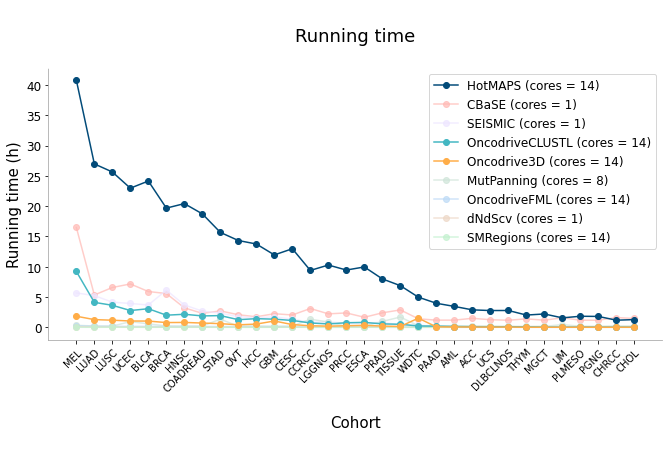

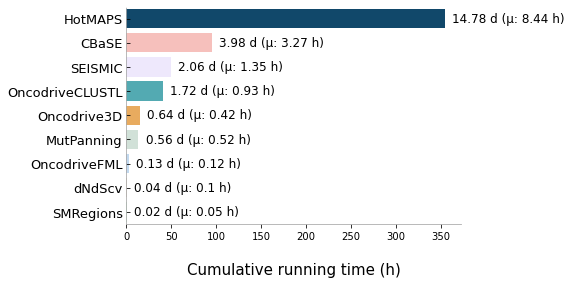

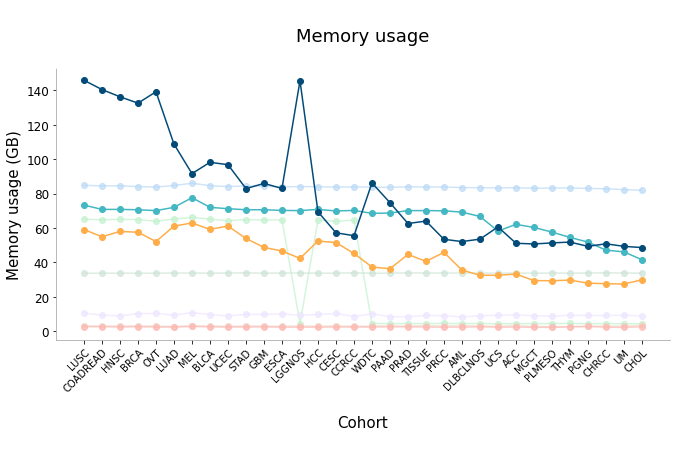

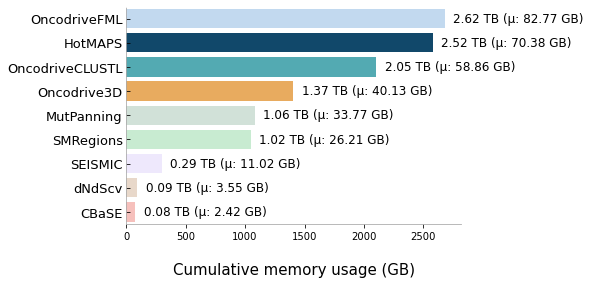

In [157]:
# Names and colors

method2color = {"Oncodrive3D" : "#ffad48", 
              "HotMAPS" : "#024b79", 
              "OncodriveCLUSTL" : "#43b7c2", 
              "SMRegions" : "#c2f1ce", 
              "CBaSE" : "#ffb8b3", 
              "SEISMIC" : "#ede5ff", 
              "dNdScv" : "#edd7c5", 
              "MutPanning" : "#cee4d8", 
              "OncodriveFML" : "#bbd9f6",
              "Random" : "pink"}

names_dic = {"o3d" : "Oncodrive3D", 
             "hotmaps" : "HotMAPS", 
             "clustl" : "OncodriveCLUSTL", 
             "smreg" : "smRegions", 
             "cbase" : "CBaSE", 
             "seismic" : "SEISMIC", 
             "dndscv" : "dNdScv", 
             "mutpan" : "MutPanning", 
             "fml" : "OncodriveFML",
             "random" : "Random"}


fig, ax = plt.subplots(figsize = (11, 5))
plot_performance(methods_tcga.sort_values("Time_H_avg", ascending=False).reset_index(drop=True), 
                 method2color, title = "\nRunning time\n", metric = "d", 
                 ax = ax, text_ylabel = "Running time (h)", xlabel = True, ylabel = True, 
                 legend = True, cpu_allocated=cpu_allocated,
                 style="-o", plot_xticks=True, extract_cancer=True)
plt.savefig('runtime_tcga_colors.png', dpi=300, bbox_inches='tight')
plt.show

fig, ax = plt.subplots(figsize = (6, 4))
plot_sum(methods_tcga, method2color, title="", ax=ax, distance = 8, xlabel_text = "\nCumulative running time (h)\n", metric="d")
plt.savefig('cumulative_runtime_tcga_colors.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize = (11, 5))
plot_performance(methods_tcga.sort_values("Memory_GB_avg", ascending=False).reset_index(drop=True), 
             method2color, title = "\nMemory usage\n", target = "Memory_GB", metric = "TB",
             ax = ax, text_ylabel = "Memory usage (GB)",
             xlabel = True, ylabel = True, legend = False,  cpu_allocated=cpu_allocated,
             style="-o", plot_xticks=True, extract_cancer=True)
plt.savefig('memory_tcga_colors.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize = (6, 4))
plot_sum(methods_tcga, method2color, title="", ax=ax, distance = 70, 
         xlabel_text = "\nCumulative memory usage (GB)\n", target="Memory_GB", metric="TB")
plt.savefig('cumulative_memory_tcga_colors.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/jobs/spellegrini/8957745/ipykernel_53489/1354606338.py:40: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


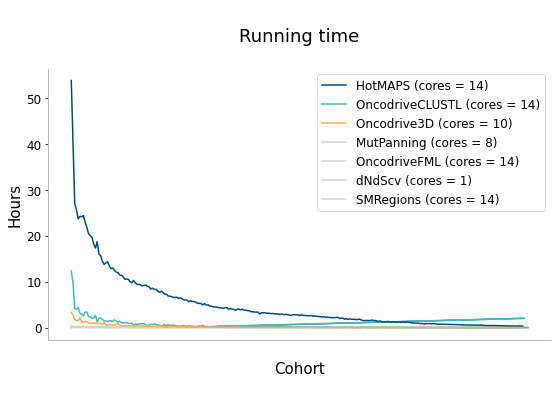

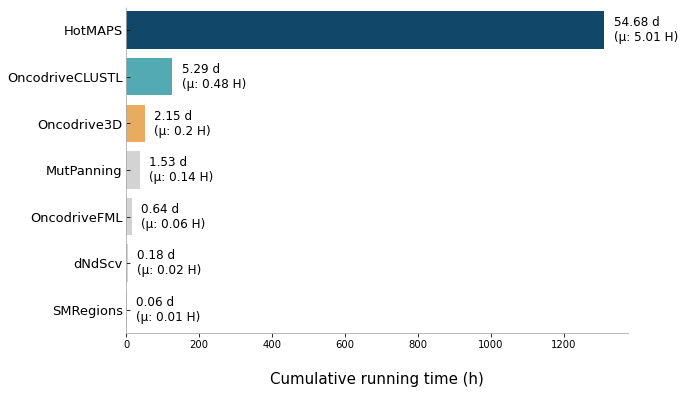

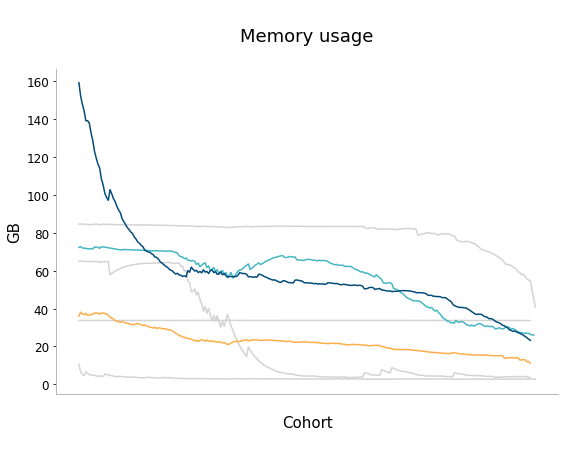

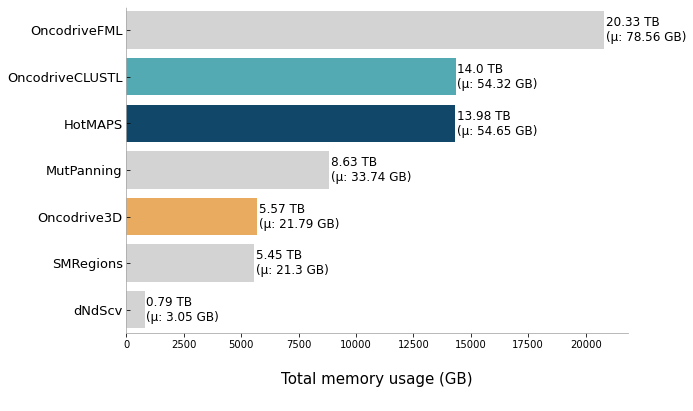

In [ ]:
fig, ax = plt.subplots(figsize = (9, 5))
plot_performance(methods.sort_values("Time_H_avg", ascending=False).reset_index(drop=True), 
                 method2color, title = "\nRunning time\n", metric = "d", 
                 ax = ax, text_ylabel = "Hours", xlabel = True, ylabel = True, 
                 legend = True, cpu_allocated=cpu_allocated,
                 style="-", plot_xticks=False, extract_cancer=False)

fig, ax = plt.subplots(figsize = (9, 6))
plot_sum(methods, method2color, title="", ax=ax, distance = 25, xlabel_text = "\nCumulative running time (h)\n", metric="d")
plt.show()

fig, ax = plt.subplots(figsize = (9, 6))
plot_performance(methods.sort_values("Memory_GB_avg", ascending=False).reset_index(drop=True), 
             method2color, title = "\nMemory usage\n", target = "Memory_GB", metric = "TB",
             ax = ax, text_ylabel = "GB", smooth=True,
             xlabel = True, ylabel = True, legend = False,  cpu_allocated=cpu_allocated,
             style="-", plot_xticks=False, extract_cancer=False)
plt.show()

fig, ax = plt.subplots(figsize = (9, 6))
plot_sum(methods, method2color, title="", ax=ax, distance = 70, 
         xlabel_text = "\nTotal memory usage (GB)\n", target="Memory_GB", metric="TB")
plt.show()